In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
isa_data = pd.read_csv('./ISA.csv')
isa_data['GFX1010'] = isa_data['GFX1010']/isa_data['GFX803']
isa_data['GFX803'] = isa_data['GFX803']/isa_data['GFX803']

isa_data = isa_data.melt(id_vars=['Benchmark'],value_vars=['GFX803','GFX1010'])
isa_data.columns=['Benchmark','ISA','Normalized\nExeution Time']

In [15]:
isa_data

Benchmark      ISA  Normalized\nExeution Time
0       ATAX   GFX803                   1.000000
1       BICG   GFX803                   1.000000
2         BS   GFX803                   1.000000
3        FIR   GFX803                   1.000000
4        FLW   GFX803                   1.000000
5        FWT   GFX803                   1.000000
6         KM   GFX803                   1.000000
7         MT   GFX803                   1.000000
8         PR   GFX803                   1.000000
9       ReLU   GFX803                   1.000000
10      SPMV   GFX803                   1.000000
11      ATAX  GFX1010                   0.988713
12      BICG  GFX1010                   0.983365
13        BS  GFX1010                   0.977306
14       FIR  GFX1010                   1.358167
15       FLW  GFX1010                   0.838567
16       FWT  GFX1010                   0.993264
17        KM  GFX1010                   1.042973
18        MT  GFX1010                   0.896573
19        PR  GFX1010                   0.999733
20      ReLU  GFX1010                   0.999971
21      SPMV  GFX1010                   1.119263

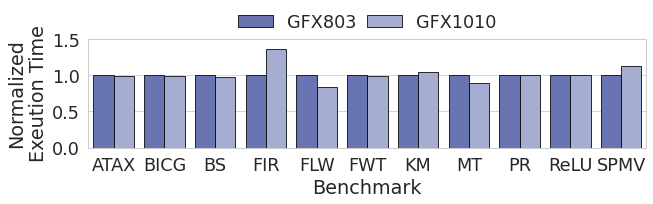

In [16]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=isa_data, 
            x='Benchmark', hue='ISA', y='Normalized\nExeution Time', 
            palette=['#5C6BC0','#9FA8DA'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=2)
ax.set_ylim(0, 1.5)
ax.set_yticks([0,0.5,1.0, 1.5])
plt.savefig('ISA.pdf', bbox_inches='tight')
plt.show()
